In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data =pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data =pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_data =pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
train_data['CryoSleep']=train_data['CryoSleep'].astype('bool')

In [6]:
train_data['VIP']=train_data['VIP'].astype('bool')

In [7]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
# Count missing values  in each column
missing_data = train_data.isnull()
# missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

PassengerId
False    8693
Name: PassengerId, dtype: int64

HomePlanet
False    8492
True      201
Name: HomePlanet, dtype: int64

CryoSleep
False    8693
Name: CryoSleep, dtype: int64

Cabin
False    8494
True      199
Name: Cabin, dtype: int64

Destination
False    8511
True      182
Name: Destination, dtype: int64

Age
False    8514
True      179
Name: Age, dtype: int64

VIP
False    8693
Name: VIP, dtype: int64

RoomService
False    8512
True      181
Name: RoomService, dtype: int64

FoodCourt
False    8510
True      183
Name: FoodCourt, dtype: int64

ShoppingMall
False    8485
True      208
Name: ShoppingMall, dtype: int64

Spa
False    8510
True      183
Name: Spa, dtype: int64

VRDeck
False    8505
True      188
Name: VRDeck, dtype: int64

Name
False    8493
True      200
Name: Name, dtype: int64

Transported
False    8693
Name: Transported, dtype: int64



In [9]:
train_data.corr()['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
VIP            -0.024602
ShoppingMall    0.010141
FoodCourt       0.046566
CryoSleep       0.451744
Transported     1.000000
Name: Transported, dtype: float64

In [10]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
train_data['HomePlanet'].replace(np.nan,'Earth',inplace=True)

In [12]:
train_data['HomePlanet'].isnull().sum()

0

In [13]:
train_data['Cabin'].isnull().sum()

199

In [14]:
train_data['Destination'].isnull().sum()

182

In [15]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [16]:
# Replace nan cell with max value(TRAPPIST-1e)
train_data['Destination'].replace(np.nan,'TRAPPIST-1e',inplace=True)

In [17]:
train_data['Destination'].isnull().sum()

0

In [18]:
train_data['Name'].isnull().sum()

200

In [19]:
# Replacing missing age value with mean
mean =train_data['Age'].mean()
train_data['Age'].replace(np.nan,mean,inplace=True)

In [20]:
train_data['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [21]:

train_data.dropna(subset=['Name'],axis=0,inplace=True)

In [22]:
train_data.dropna(subset=['Spa'],axis=0,inplace=True)

In [23]:
train_data.dropna(subset=['RoomService'],axis=0,inplace=True)

In [24]:
train_data.dropna(subset=['VRDeck'],axis=0,inplace=True)

In [25]:
train_data.dropna(subset=['FoodCourt'],axis=0,inplace=True)

In [26]:
train_data.dropna(subset=['ShoppingMall'],axis=0,inplace=True)

In [27]:
train_data.dropna(subset=['Cabin'],axis=0,inplace=True)

In [28]:
train_data['Cabin'].isnull().sum()

0

In [29]:
train_data['Cabin'].value_counts()

B/201/P    7
C/137/S    7
E/13/S     7
B/11/S     7
G/734/S    7
          ..
F/701/P    1
G/547/S    1
G/557/P    1
G/556/P    1
E/291/P    1
Name: Cabin, Length: 5849, dtype: int64

In [30]:
train_data.max()

PassengerId              9280_02
HomePlanet                  Mars
CryoSleep                   True
Cabin                      T/3/P
Destination          TRAPPIST-1e
Age                         79.0
VIP                         True
RoomService               9920.0
FoodCourt                29813.0
ShoppingMall             12253.0
Spa                      22408.0
VRDeck                   20336.0
Name            Zubeneb Pasharne
Transported                 True
dtype: object

In [31]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [32]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
# Descriptive statistics
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
X = train_data.copy()
y = X.pop('Transported')

# Label Encoding
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
discrete_features = X.dtypes == int


from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[:3]  # show a few features with their MI scores

In [35]:
train_data.corr()['Transported']

CryoSleep       0.448251
Age            -0.080361
VIP            -0.025918
RoomService    -0.247911
FoodCourt       0.054430
ShoppingMall    0.006165
Spa            -0.221139
VRDeck         -0.208297
Transported     1.000000
Name: Transported, dtype: float64

In [36]:
train_data[['Cabin','Transported']].corr()

,Transported
Transported,1.0


In [37]:
# X_4 = pd.DataFrame()

train_data["Cabin_side"] = train_data.Cabin.str.split("/", expand=True)[2]

In [38]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [39]:
train_data[['Cabin_side','Transported']].corr()

,Transported
Transported,1.0


In [40]:
dummy_cabin = pd.get_dummies(train_data['Cabin_side'],prefix='Cabin_side')
dummy_cabin.head()

,Cabin_side_P,Cabin_side_S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [42]:
df = train_data.groupby(['Cabin_side','Destination'])['Transported'].count()
df.head()

Cabin_side  Destination  
P           55 Cancri e       739
            PSO J318.5-22     342
            TRAPPIST-1e      2580
S           55 Cancri e       793
            PSO J318.5-22     340
Name: Transported, dtype: int64

In [43]:
df_destination = train_data.groupby('Destination')['Transported'].count()
df_destination.head()

Destination
55 Cancri e      1532
PSO J318.5-22     682
TRAPPIST-1e      5211
Name: Transported, dtype: int64

In [44]:
df_destination = train_data.groupby(['Cabin_side'])['Transported'].count()
df_destination.head()

Cabin_side
P    3661
S    3764
Name: Transported, dtype: int64

In [45]:
df_Cryosleep = train_data.groupby(['CryoSleep'])['Transported'].count()
df_Cryosleep.head()

CryoSleep
False    4686
True     2739
Name: Transported, dtype: int64

In [46]:
train_data[['HomePlanet','Transported']].corr()

,Transported
Transported,1.0


In [47]:
train_data.corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.448251
FoodCourt       0.054430
ShoppingMall    0.006165
VIP            -0.025918
Age            -0.080361
VRDeck         -0.208297
Spa            -0.221139
RoomService    -0.247911
Name: Transported, dtype: float64

In [48]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [49]:
dummy_destination = pd.get_dummies(train_data['Destination'],prefix='destination')

In [50]:
dummy_destination.head()

,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [51]:
#Drop column Destination Column
train_data = pd.concat([train_data,dummy_destination],axis=1)
train_data.drop("Destination",axis=1,inplace=True)

In [52]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0001_01,Europa,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,0,1
1,0002_01,Earth,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,0,1
2,0003_01,Europa,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,0,1
3,0003_02,Europa,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,0,1
4,0004_01,Earth,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,0,0,1


<AxesSubplot:xlabel='Age', ylabel='Transported'>

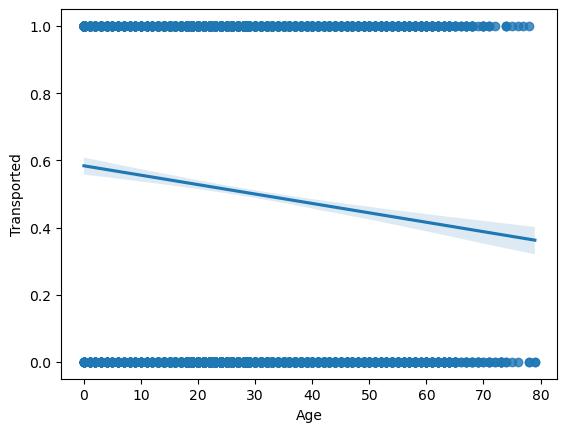

In [53]:
import seaborn as sns
sns.regplot(x="Age",y="Transported",data=train_data)

<AxesSubplot:xlabel='FoodCourt', ylabel='Transported'>

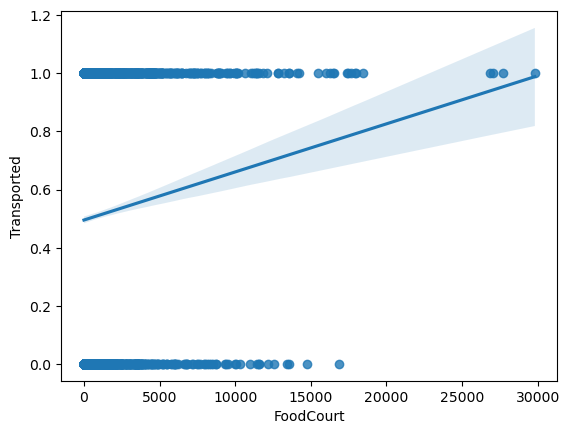

In [54]:
sns.regplot(x="FoodCourt",y="Transported",data=train_data)

In [55]:
# Age normalization
train_data['Age'] = train_data['Age']/train_data['Age'].max()

In [56]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0001_01,Europa,False,B/0/P,0.493671,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,0,1
1,0002_01,Earth,False,F/0/S,0.303797,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,0,1
2,0003_01,Europa,False,A/0/S,0.734177,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,0,1
3,0003_02,Europa,False,A/0/S,0.417722,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,0,1
4,0004_01,Earth,False,F/1/S,0.202532,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,0,0,1


In [57]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [58]:
#Drop all rows with missing values
test_data.dropna(inplace=True)

In [59]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [60]:
test_data['Age'] = test_data['Age']/test_data['Age'].max()

In [61]:
dummy_destination = pd.get_dummies(test_data['Destination'],prefix='destination')
test_data = pd.concat([test_data,dummy_destination],axis=1)
test_data.drop("Destination",axis=1,inplace=True)

In [62]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0013_01,Earth,True,G/3/S,0.341772,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,1
1,0018_01,Earth,False,F/4/S,0.240506,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,1
2,0019_01,Europa,True,C/0/S,0.392405,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,0
3,0021_01,Europa,False,C/1/S,0.481013,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,0,1
4,0023_01,Earth,False,F/5/S,0.253165,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,1


In [63]:
test_data["Cabin_side"] = test_data.Cabin.str.split("/", expand=True)[2]
dummy_cabin01 = pd.get_dummies(test_data['Cabin_side'],prefix='Cabin_side')
dummy_cabin01.head()

,Cabin_side_P,Cabin_side_S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [64]:
train_data.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.448251
destination_55 Cancri e      0.121659
FoodCourt                    0.054430
destination_PSO J318.5-22    0.006638
ShoppingMall                 0.006165
VIP                         -0.025918
Age                         -0.080361
destination_TRAPPIST-1e     -0.111811
VRDeck                      -0.208297
Spa                         -0.221139
RoomService                 -0.247911
Name: Transported, dtype: float64

In [65]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,Cabin_side
0,0013_01,Earth,True,G/3/S,0.341772,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,1,S
1,0018_01,Earth,False,F/4/S,0.240506,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,1,S
2,0019_01,Europa,True,C/0/S,0.392405,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,0,S
3,0021_01,Europa,False,C/1/S,0.481013,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,0,1,S
4,0023_01,Earth,False,F/5/S,0.253165,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,1,S


In [66]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Transported"]

features = ["CryoSleep", "FoodCourt", "Age","destination_55 Cancri e","destination_PSO J318.5-22","destination_TRAPPIST-1e"]
X = train_data[features]
X_test = test_data[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
